In [7]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

from sklearn.neighbors import KernelDensity
from statsmodels.distributions.empirical_distribution import ECDF

# Question 1

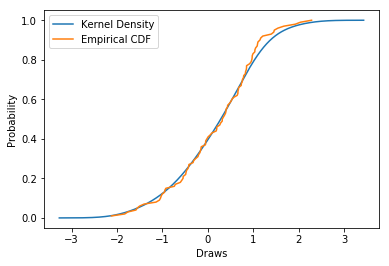

In [12]:
sample = np.random.normal(0,1, 100)
sample.sort() #insure in order

#note default kernel is Guassian, default bandwith is 1.06
kdens = sm.nonparametric.KDEUnivariate(sample) 
kdens.fit()

ec = ECDF(sample)
ec = ec(sample)

plt.plot(kdens.support, kdens.cdf, label='Kernel Density')
plt.plot(sample, ec, label='Empirical CDF')
plt.ylabel('Probability')
plt.xlabel('Draws')
plt.legend()
plt.show()

# Question 2

In [13]:
wage1 = pd.read_stata('Homework/WAGE1.DTA')
print wage1.columns

Index([u'wage', u'educ', u'exper', u'tenure', u'nonwhite', u'female',
       u'married', u'numdep', u'smsa', u'northcen', u'south', u'west',
       u'construc', u'ndurman', u'trcommpu', u'trade', u'services',
       u'profserv', u'profocc', u'clerocc', u'servocc', u'lwage', u'expersq',
       u'tenursq'],
      dtype='object')


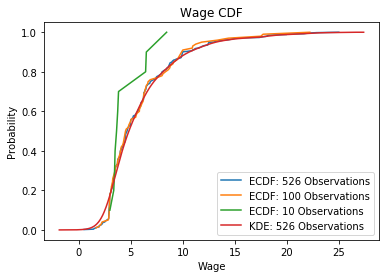

In [14]:
nobs = wage1.shape[0]
wage_obs = [nobs, 100, 10 ] #size of sample required

#do various empirical CDFs
for i in wage_obs:
    #note we are drawing without replacement (so nobs is the full sample)
    wages = np.random.choice(wage1['wage'], i, replace=False)
    wages.sort()
    wages_ecdf = ECDF(wages)
    wages_ecdf = wages_ecdf(wages)
    plt.plot(wages, wages_ecdf, label='ECDF: %s Observations'%i)


#do KDE
wages = np.array(wage1['wage']).astype(float)
wage_dens = sm.nonparametric.KDEUnivariate(wages)  
wage_dens.fit()
plt.plot(wage_dens.support, wage_dens.cdf, label='KDE: 526 Observations')

#set labels
plt.ylabel('Probability')
plt.xlabel('Wage')
plt.title('Wage CDF')
plt.legend()

plt.show()

# Question 3

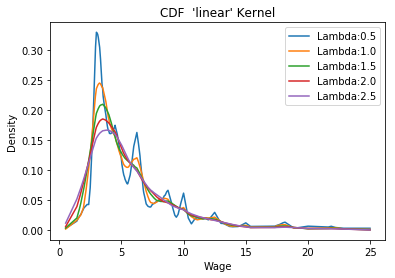

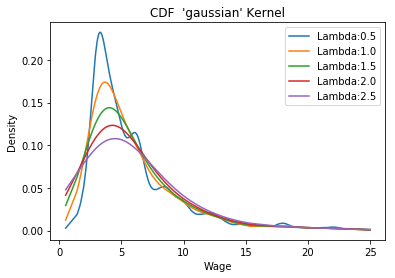

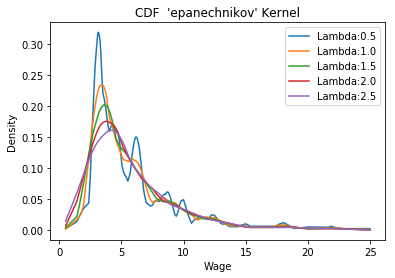

In [15]:
#having issues with statsmodels libraries, switching to sklearn...

#set up data again (just in case)
wages = np.array(wage1['wage']).astype(float)
wages.sort()
nobs = wage1.shape[0]

lambdas = np.arange(.5,3,.5)
sigma = wages.var()**.5

kernels = ['linear', 'gaussian', 'epanechnikov']

for k in kernels:
    for l in lambdas:
        band = l*sigma*nobs**(-.2)
        wage_dens = KernelDensity(kernel=k,bandwidth=band)
        wage_dens = wage_dens.fit(wages.reshape(nobs,1))
        wage_dens = np.exp(wage_dens.score_samples(wages.reshape(nobs,1)))
        plt.plot(wages, wage_dens, label='Lambda:%s'%(l))
        
    plt.ylabel('Density')
    plt.xlabel('Wage')
    plt.title("CDF  '%s' Kernel"%k)
    plt.legend()
    plt.show()
    
        

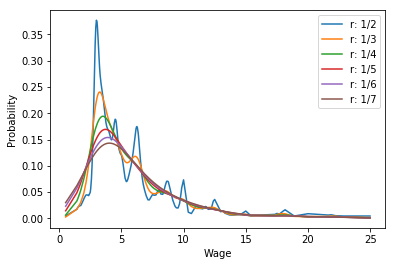

In [17]:
#set up data again (just in case)
wages = np.array(wage1['wage']).astype(float)
wages.sort()
nobs = wage1.shape[0]

rs = np.arange(2,8,1)

for r in rs:
        band = 1.06*sigma*nobs**(-(1./r))
        wage_dens = KernelDensity(bandwidth=band)
        wage_dens = wage_dens.fit(wages.reshape(nobs,1))
        wage_dens = np.exp(wage_dens.score_samples(wages.reshape(nobs,1)))
        plt.plot(wages, wage_dens, label='r: 1/%s'%(r))

plt.ylabel('Probability')
plt.xlabel('Wage')
plt.legend()
plt.show()
    
